In [1]:
#Importing all the necessary python libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN
from kmodes.kmodes import KModes
from sklearn.mixture import GaussianMixture 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity

import scipy.cluster.hierarchy as shc
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the tab delimiter csv file

data = pd.read_csv('data-final.csv', sep='\t')

In [3]:
#Checking the head of the dataset

data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [4]:
#Taking only the questionnaire variables as the task is to make clusters based on these variables

data_filtered = data.iloc[:,:50]

print("Shape after filtereing the required columns:", data_filtered.shape)

Shape after filtereing the required columns: (1015341, 50)


In [5]:
data_filtered.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0


In [6]:
#Checking the dataframe info

data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Data columns (total 50 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   EXT1    1013558 non-null  float64
 1   EXT2    1013558 non-null  float64
 2   EXT3    1013558 non-null  float64
 3   EXT4    1013558 non-null  float64
 4   EXT5    1013558 non-null  float64
 5   EXT6    1013558 non-null  float64
 6   EXT7    1013558 non-null  float64
 7   EXT8    1013558 non-null  float64
 8   EXT9    1013558 non-null  float64
 9   EXT10   1013558 non-null  float64
 10  EST1    1013558 non-null  float64
 11  EST2    1013558 non-null  float64
 12  EST3    1013558 non-null  float64
 13  EST4    1013558 non-null  float64
 14  EST5    1013558 non-null  float64
 15  EST6    1013558 non-null  float64
 16  EST7    1013558 non-null  float64
 17  EST8    1013558 non-null  float64
 18  EST9    1013558 non-null  float64
 19  EST10   1013558 non-null  float64
 20  AGR1    1013558 non-null

 Every column is a float64, so need to change the data type

In [7]:
#Checking for any null values in the filtered dataframe

data_filtered.isnull().sum()

EXT1     1783
EXT2     1783
EXT3     1783
EXT4     1783
EXT5     1783
EXT6     1783
EXT7     1783
EXT8     1783
EXT9     1783
EXT10    1783
EST1     1783
EST2     1783
EST3     1783
EST4     1783
EST5     1783
EST6     1783
EST7     1783
EST8     1783
EST9     1783
EST10    1783
AGR1     1783
AGR2     1783
AGR3     1783
AGR4     1783
AGR5     1783
AGR6     1783
AGR7     1783
AGR8     1783
AGR9     1783
AGR10    1783
CSN1     1783
CSN2     1783
CSN3     1783
CSN4     1783
CSN5     1783
CSN6     1783
CSN7     1783
CSN8     1783
CSN9     1783
CSN10    1783
OPN1     1783
OPN2     1783
OPN3     1783
OPN4     1783
OPN5     1783
OPN6     1783
OPN7     1783
OPN8     1783
OPN9     1783
OPN10    1783
dtype: int64

 There are 1783 records with null values with every variable. Let's check if these null values are in same rows

In [8]:
null_shape = data_filtered[data_filtered.isnull().any(axis=1)].shape

if null_shape[0] == 1783:
    print("All the NULL entries are in same rows")
else:
    print("NULL entries are in different rows")

All the NULL entries are in same rows


In [9]:
#There is no need to imputationn for NULL values, we can directly removes these records as these are small compared to the 
#available dataset

data_filtered_null = data_filtered.dropna()

print("Datafrae shape after removing NULL values in all the columns:", data_filtered_null.shape)

Datafrae shape after removing NULL values in all the columns: (1013558, 50)


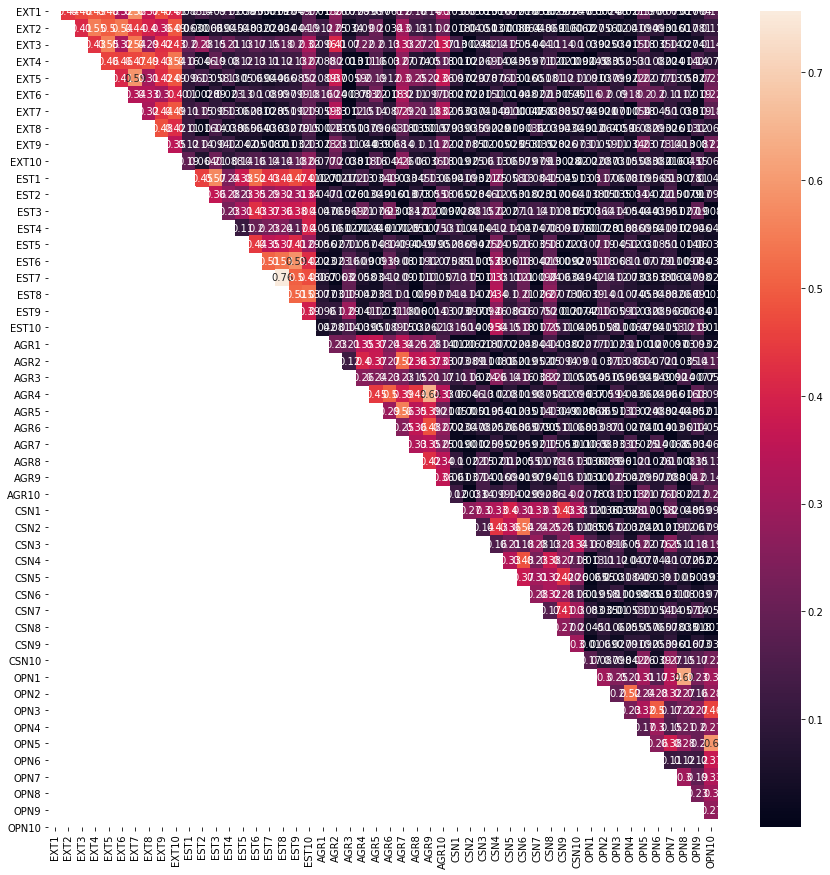

In [10]:
#Checking correlation between available variables

# Create correlation matrix
corr_matrix = data_filtered_null.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

#Plot the heatmap based on the correlation
plt.figure(figsize=(15,15))
sns.heatmap(upper, annot=True)

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [11]:
#Remove vriables having more than 95% correlation 

data_filtered_null = data_filtered_null.drop(columns=to_drop, axis=1)

print("Dataframe shape after removing highly correlated variable:", data_filtered_null.shape)

Dataframe shape after removing highly correlated variable: (1013558, 50)


 No two variables are highly correlated

In [12]:
#Randomly choose 5K Records to speed up the process of seleting the algorithms and take a quick look at clusters

data_samples = data_filtered_null.sample(n=5000) 

  There is no need to standardize the data as all the variables are ordinal categorical variables

### VISUALIZING DATA

Text(0, 0.5, 'cumulative explained variance')

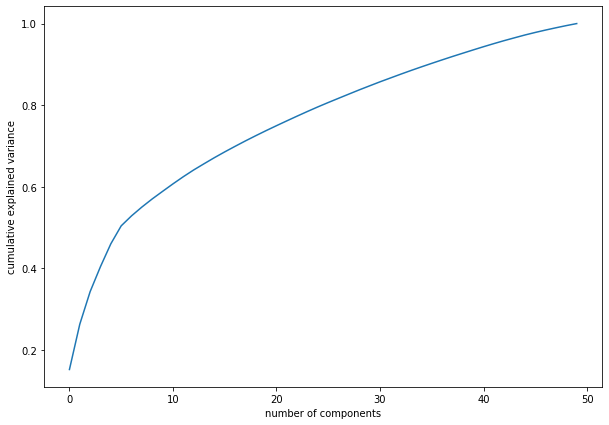

In [13]:
#Checking the Variance explained based on the number of principal component via PCA
#This is to get the idea how many of the PCA component would be required to reduce the data dimensions

pca = PCA().fit(data_samples)
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

 It's visible that first 5 principal component consists of 50% of variance in the dataset


 % of variance explained by 2 components of PCA 26.33


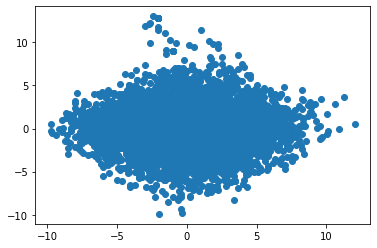

In [14]:
#Visualizing the data set using PCA with number of component=2 

X = np.asarray(data_samples)
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
print("\n % of variance explained by 2 components of PCA", round((pca.explained_variance_ratio_[0] + 
                                                      pca.explained_variance_ratio_[1])*100,2))

# Visualizing the data in 2-D 
plt.scatter(X_principal['P1'], X_principal['P2'], cmap =plt.cm.winter) 
plt.show() 


 % of variance explained by 3 components of PCA 34.31


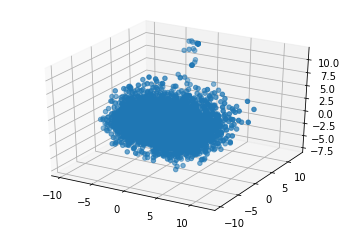

In [15]:
#Visualizing the data set using PCA with number of component=3

X = np.asarray(data_samples)
pca = PCA(n_components = 3) 
X_principal = pca.fit_transform(X) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2', 'P3'] 

print("\n % of variance explained by 3 components of PCA", round((pca.explained_variance_ratio_[0] + 
                                                      pca.explained_variance_ratio_[1] + 
                                                      pca.explained_variance_ratio_[2])*100,2))


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(X_principal['P1'], X_principal['P2'], X_principal['P3'], cmap =plt.cm.winter)
plt.show()

 Data looks like a big spherical cluster and there is not much difference with 2 or 3 principal components of PCA

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.059s...
[t-SNE] Computed neighbors for 5000 samples in 1.903s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 2.248324
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.626259
[t-SNE] KL divergence after 300 iterations: 3.209496


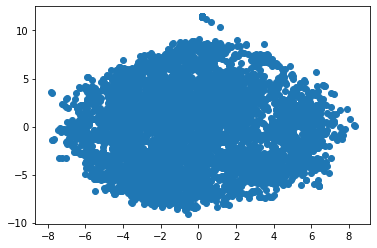

In [16]:
#Let's also visualize the data using t-SNE with number of dimension=2

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_samples)


# Visualizing the data in 2-D 
plt.scatter(tsne_results[:,0], tsne_results[:,1], cmap =plt.cm.winter) 
plt.show() 

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.065s...
[t-SNE] Computed neighbors for 5000 samples in 2.041s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 2.248324
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.609894
[t-SNE] KL divergence after 500 iterations: 2.546942


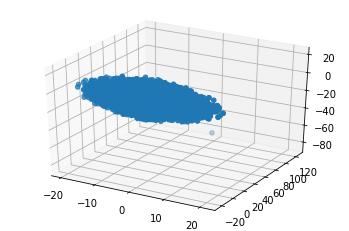

In [17]:
#Visualizing the data set using t-SNE with number of dimension=3

tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=500)
tsne_results = tsne.fit_transform(data_samples)
t_sne_principal = pd.DataFrame(tsne_results) 
t_sne_principal.columns = ['P1', 'P2', 'P3'] 


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(t_sne_principal['P1'], t_sne_principal['P2'], t_sne_principal['P3'], cmap =plt.cm.winter)
plt.show()

 Results are very similar with PCA and T-SNE, data is scatter in a big spherical cluster 
 and there is not much difference with 2 or 3 principal components of t-SNE

### CLUSTERING

K_Means Clustering

Text(0.5, 1.0, 'Elbow Curve')

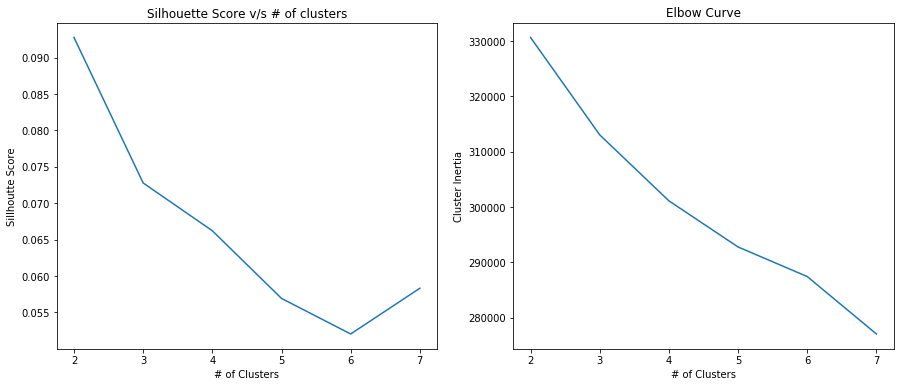

In [18]:
#Using all original 50 variables using sample dataset

'''
How we define silhouette coefficient:
For each point p, first find the average distance between p and all other points in the same cluster 
(this is a measure of cohesion, call it A). Then find the average distance between p and all points in the nearest cluster 
(this is a measure of separation from the closest other cluster, call it B). The silhouette coefficient for p is defined as 
the difference between B and A divided by the greater of the two (max(A,B)).

'''

#Running K-Means clustering algorithm with a range of clueters to determine the silhouette score and inertia associated
#with each cluster. It is useful in determining the number of clusters

sill = []
cost = []
for k in range(2,8):
    kmean = KMeans(n_clusters=k, random_state=42, init = 'random')
    kmean = kmean.fit(data_samples)
    score = silhouette_score(data_samples,  kmean.labels_)
    sill.append(score)
    cost.append(kmean.inertia_)

    
#Plotting the Elbow and Silhoutte curve for K-Means clustering

fig, ax = plt.subplots(figsize=(15, 6))

plt.subplot(1,2,1)
plt.plot(range(2,8), sill)
plt.xlabel("# of Clusters")
plt.ylabel('Sillhoutte Score')
plt.title('Silhouette Score v/s # of clusters')


plt.subplot(1,2,2)
plt.plot(range(2,8), cost)
plt.xlabel("# of Clusters")
plt.ylabel('Cluster Inertia')
plt.title('Elbow Curve')

 Based on the Silhoutte Score, we can analyze with # of clusters = 3 or 4

Text(0.5, 1.0, 'K-Means with 4 clusters')

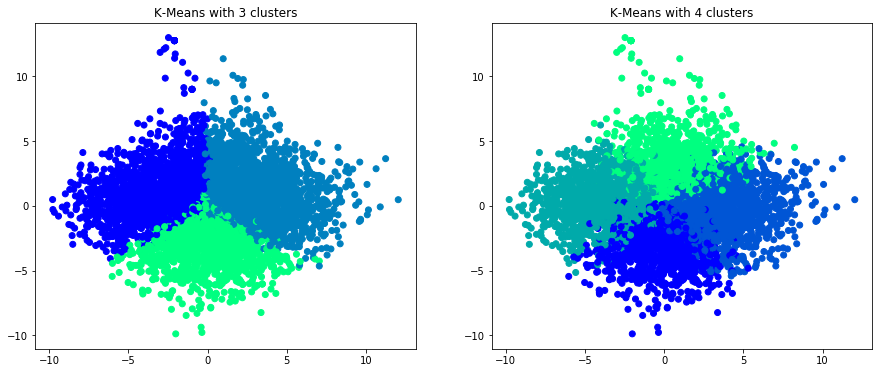

In [19]:
#Visualizing K-Means with # of clusters = 3 and 4 in d-D

#Reducing the dimensions using PCA with 2 principal components
X = np.asarray(data_samples)
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  

# Visualizing the clustering 

fig, ax = plt.subplots(figsize=(15, 6))
plt.subplot(1,2,1)
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = KMeans(n_clusters=3, random_state=42, init = 'random').fit_predict(data_samples), cmap =plt.cm.winter)  
plt.title("K-Means with 3 clusters")


plt.subplot(1,2,2)
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = KMeans(n_clusters=4, random_state=42, init = 'random').fit_predict(data_samples), cmap =plt.cm.winter)  
plt.title("K-Means with 4 clusters")

Text(0.5, 0.92, 'K-Means with 4 clusters (3-D)')

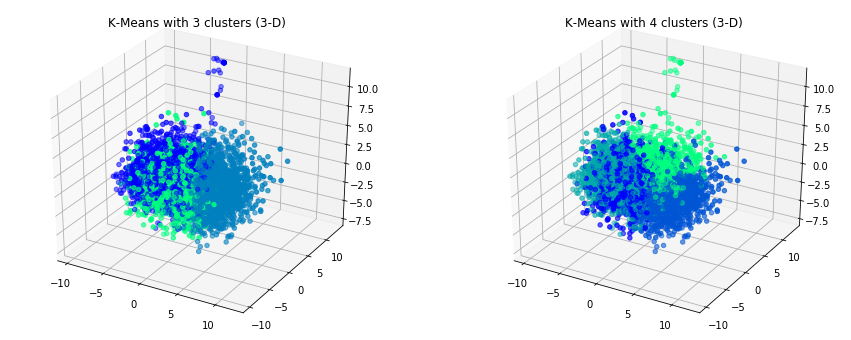

In [20]:
#Visualizing K-Means with # of clusters = 3 and 4 in 3-dimensional graph

#Reducing the dimensions using PCA with 3 principal components
X = np.asarray(data_samples)
pca = PCA(n_components = 3) 
X_principal = pca.fit_transform(X) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2', 'P3'] 

fig = plt.figure(figsize=(15, 6))


ax = fig.add_subplot(121, projection='3d')
ax.scatter(X_principal['P1'], X_principal['P2'], X_principal['P3'], 
           c = KMeans(n_clusters=3, random_state=42, init = 'random').fit_predict(data_samples), cmap =plt.cm.winter)
plt.title("K-Means with 3 clusters (3-D)")



ax = fig.add_subplot(122, projection='3d')
ax.scatter(X_principal['P1'], X_principal['P2'], X_principal['P3'], 
           c = KMeans(n_clusters=4, random_state=42, init = 'random').fit_predict(data_samples), cmap =plt.cm.winter)
plt.title("K-Means with 4 clusters (3-D)")


 We can see a good seperation between clusters in 2 dimensional graph. Silhoutte score is low meaning the inter cluster   distance is less and intracluster distance is large and some overlapping clusters which explains the low silhoutte score

Text(0.5, 1.0, 'Reduced dim K-Means Elbow curve')

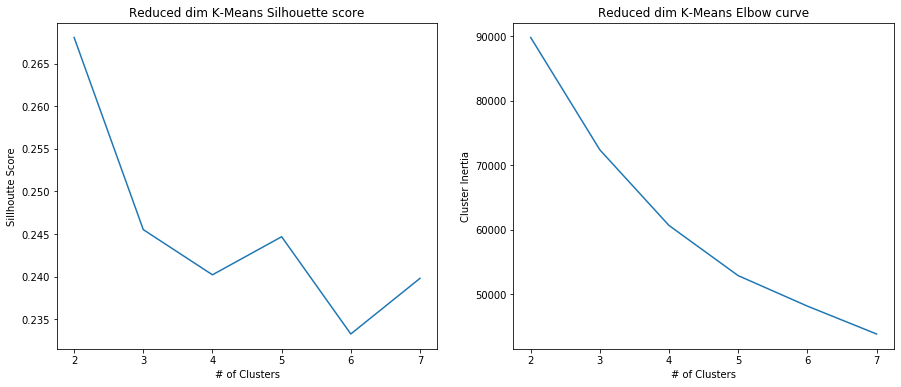

In [21]:
'''
Let's first try to reduce the dimensions using PCA and then apply K-Means algorithm 

Since data is sparse with 50 variables, try to see if redcuing dimension is helping K_Means algo to work 
efficiently as K-Means is a distance based algorithm

'''

#Reducing dimensions using PCA with no of components = 3
pca = PCA(n_components = 3) 
X_principal = pca.fit_transform(data_samples) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2', 'P3']


#Applying K-Means algorithm to identify optimum number of clusters
sill = []
cost = []
for k in range(2,8):
    kmean = KMeans(n_clusters=k, random_state=42, init = 'random')
    kmean = kmean.fit(X_principal)
    score = silhouette_score(X_principal,  kmean.labels_)
    sill.append(score)
    cost.append(kmean.inertia_)

    
    
#Plotting the Elbow and Silhouette curve for K-Means clustering
fig, ax = plt.subplots(figsize=(15, 6))

plt.subplot(1,2,1)
plt.plot(range(2,8), sill)
plt.xlabel("# of Clusters")
plt.ylabel('Sillhoutte Score')
plt.title('Reduced dim K-Means Silhouette score')


plt.subplot(1,2,2)
plt.plot(range(2,8), cost)
plt.xlabel("# of Clusters")
plt.ylabel('Cluster Inertia')
plt.title('Reduced dim K-Means Elbow curve')

 We can see improvement in Silhoutte Score, we can analyze with # of clusters = 2, 3 or 5

Text(0.5, 1.0, 'Reduced dim. K-Means with 5 clusters')

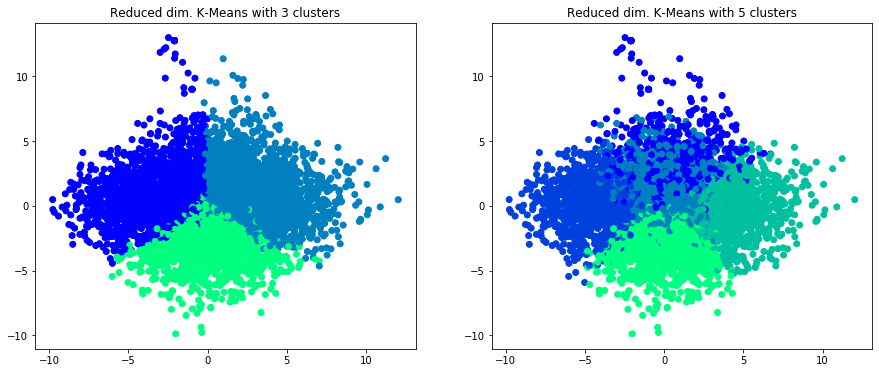

In [22]:
#Visualizing K-Means with # of clusters = 3 and 5
 
fig, ax = plt.subplots(figsize=(15, 6))


plt.subplot(1,2,1)
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = KMeans(n_clusters=3, random_state=42, init = 'random').fit_predict(X_principal), cmap =plt.cm.winter)  
plt.title("Reduced dim. K-Means with 3 clusters")

plt.subplot(1,2,2)
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = KMeans(n_clusters=5, random_state=42, init = 'random').fit_predict(X_principal), cmap =plt.cm.winter)  
plt.title("Reduced dim. K-Means with 5 clusters")

Text(0.5, 0.92, 'Reduced dim. K-Means with 5 clusters (3-D)')

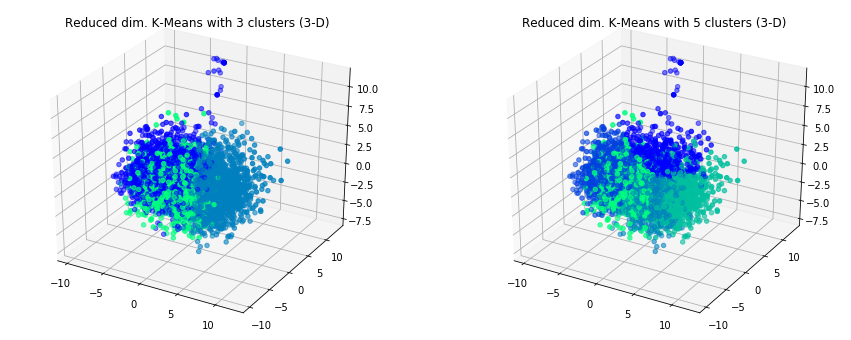

In [23]:
#Visualizing K-Means with # of clusters = 3 and 4 in 3-dimensional graph

fig = plt.figure(figsize=(15, 6))


ax = fig.add_subplot(121, projection='3d')
ax.scatter(X_principal['P1'], X_principal['P2'], X_principal['P3'], 
           c = KMeans(n_clusters=3, random_state=42, init = 'random').fit_predict(X_principal), cmap =plt.cm.winter)
plt.title("Reduced dim. K-Means with 3 clusters (3-D)")



ax = fig.add_subplot(122, projection='3d')
ax.scatter(X_principal['P1'], X_principal['P2'], X_principal['P3'], 
           c = KMeans(n_clusters=5, random_state=42, init = 'random').fit_predict(X_principal), cmap =plt.cm.winter)
plt.title("Reduced dim. K-Means with 5 clusters (3-D)")


 By reducing dimensions using PCA before applying KMeans is definetly improving the silhoutte score but the cluster
 visualizations are almost same

Agglomerative (hierarchical) Clustering

Text(0.5, 1.0, 'Silhouette Score with single linkage')

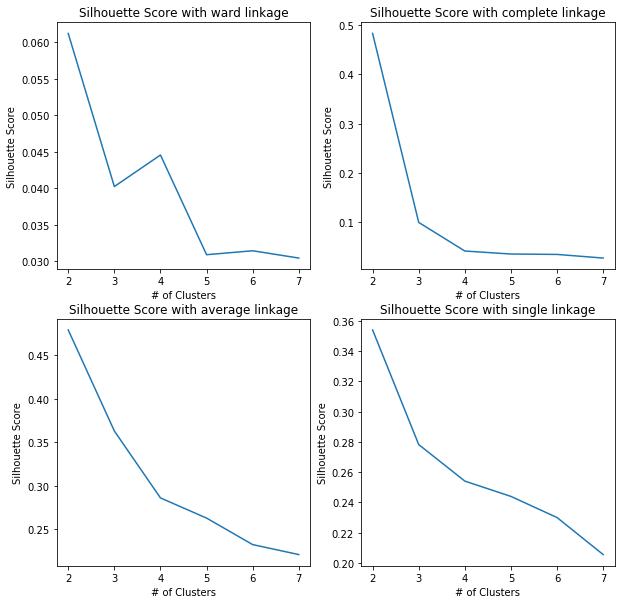

In [24]:
'''
Agglomerative Clustering: Recursively merges the pair of clusters that minimally increases a given linkage distance.
linkage : {"ward", "complete", "average", "single"}

'''


#Calculating Silhouette score as well as visualizing dendograms to identify the number of clusters

sill_ward = [] 
for n_cluster in range(2, 8):
    sill_ward.append( 
        silhouette_score(data_samples, AgglomerativeClustering(n_clusters = n_cluster, 
                                                               linkage ='ward' ).fit_predict(data_samples))) 
sill_complete = []
for n_cluster in range(2, 8):
    sill_complete.append( 
        silhouette_score(data_samples, AgglomerativeClustering(n_clusters = n_cluster, 
                                                               linkage ='complete').fit_predict(data_samples))) 
sill_avg = []
for n_cluster in range(2, 8):
    sill_avg.append( 
        silhouette_score(data_samples, AgglomerativeClustering(n_clusters = n_cluster, 
                                                               linkage ='average').fit_predict(data_samples))) 
sill_single = []
for n_cluster in range(2, 8):
    sill_single.append( 
        silhouette_score(data_samples, AgglomerativeClustering(n_clusters = n_cluster, 
                                                               linkage ='single').fit_predict(data_samples))) 


#Plotting the Silhouette curve for Agglomerative clustering with different linkage types

fig, ax = plt.subplots(figsize=(10, 10))


plt.subplot(2,2,1)
plt.plot(range(2,8), sill_ward)
plt.xlabel("# of Clusters")
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score with ward linkage')

plt.subplot(2,2,2)
plt.plot(range(2,8), sill_complete)
plt.xlabel("# of Clusters")
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score with complete linkage')

plt.subplot(2,2,3)
plt.plot(range(2,8), sill_avg)
plt.xlabel("# of Clusters")
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score with average linkage')


plt.subplot(2,2,4)
plt.plot(range(2,8), sill_single)
plt.xlabel("# of Clusters")
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score with single linkage')

 Average, single and Complete linkage type has the highest silhoutte score with number of clusters 2, 3, 4 and 5.
 We can discard 'Ward' linkage type as the score is very low.

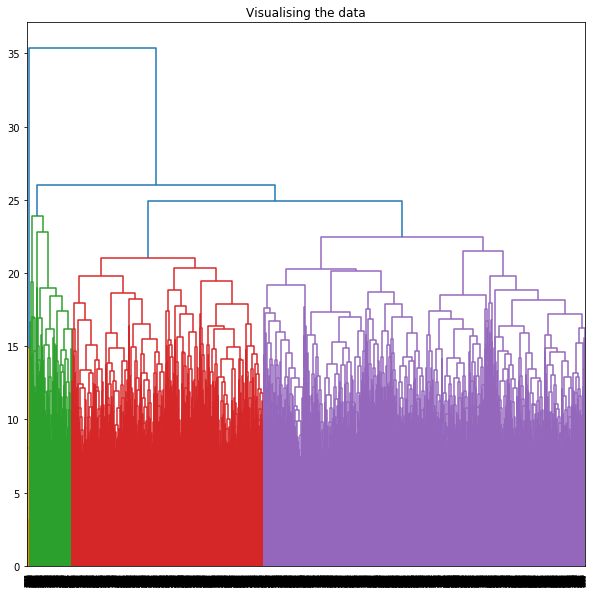

In [25]:
#Visualizing Dedndograms

plt.figure(figsize =(10, 10))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(data_samples, method ='complete')))

 We can cut the dendograms to get the number of clusters = 2, 3, 4 and 5
 
 Dendograms follows bottom-up approach and represents the relationships of similarity among a group of entities

Text(0.5, 1.0, 'Complete linkage')

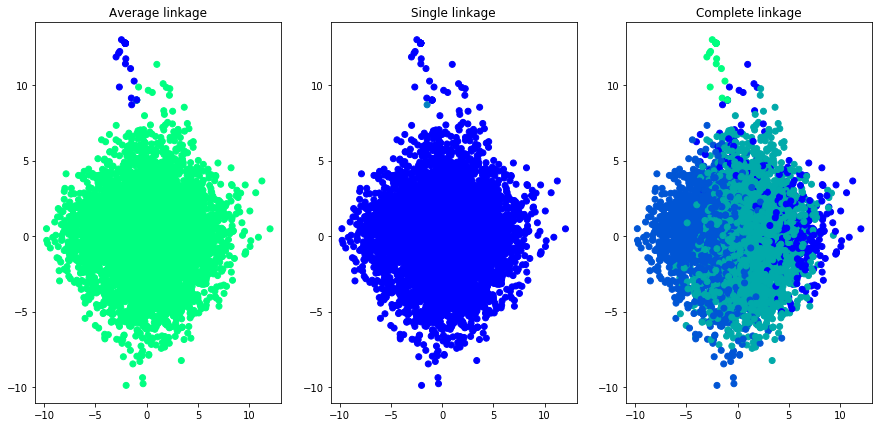

In [27]:
#Visualizing clusters in 2-D formed by AgglomerativeClustering with number of clusters = 3 and with different linkage type
#to identify which linkage type is giving clear clusters

#Reducing the dimensions using PCA with 2 principal components
X = np.asarray(data_samples)
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  

# Visualizing the clustering 

fig, ax = plt.subplots(figsize=(15, 7))
plt.subplot(1,3,1)
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = AgglomerativeClustering(n_clusters = 2, linkage ='average').fit_predict(data_samples), cmap =plt.cm.winter)  
plt.title("Average linkage")

plt.subplot(1,3,2)
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = AgglomerativeClustering(n_clusters = 3, linkage ='single').fit_predict(data_samples), cmap =plt.cm.winter)  
plt.title("Single linkage")

plt.subplot(1,3,3)
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = AgglomerativeClustering(n_clusters = 4, linkage ='complete').fit_predict(data_samples), cmap =plt.cm.winter)  
plt.title("Complete linkage")


 Only complete linkage type is giving somewhat seperating clusters. So, discard average and single linkage type

Text(0.5, 1.0, 'Agglomerative clustering - 5 clusters')

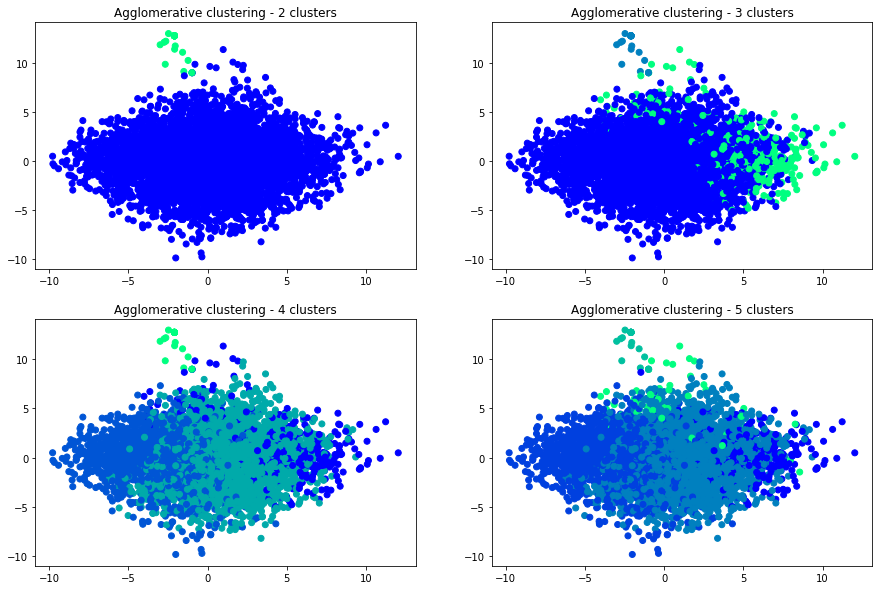

In [28]:
#Visualizing clusters in 2-D formed by AgglomerativeClustering with number of clusters = 2,3,4


#Reducing the dimensions using PCA with 2 principal components
X = np.asarray(data_samples)
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  

# Visualizing the clustering 

fig, ax = plt.subplots(figsize=(15, 10))
plt.subplot(2,2,1)
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = AgglomerativeClustering(n_clusters = 2, linkage ='complete').fit_predict(data_samples), cmap =plt.cm.winter)  
plt.title("Agglomerative clustering - 2 clusters")

plt.subplot(2,2,2)
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = AgglomerativeClustering(n_clusters = 3, linkage ='complete').fit_predict(data_samples), cmap =plt.cm.winter)  
plt.title("Agglomerative clustering - 3 clusters")

plt.subplot(2,2,3)
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = AgglomerativeClustering(n_clusters = 4, linkage ='complete').fit_predict(data_samples), cmap =plt.cm.winter)  
plt.title("Agglomerative clustering - 4 clusters")


plt.subplot(2,2,4)
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = AgglomerativeClustering(n_clusters = 5, linkage ='complete').fit_predict(data_samples), cmap =plt.cm.winter)  
plt.title("Agglomerative clustering - 5 clusters")

Text(0.5, 0.92, 'Agglomerative clustering - 5 clusters (3-D)')

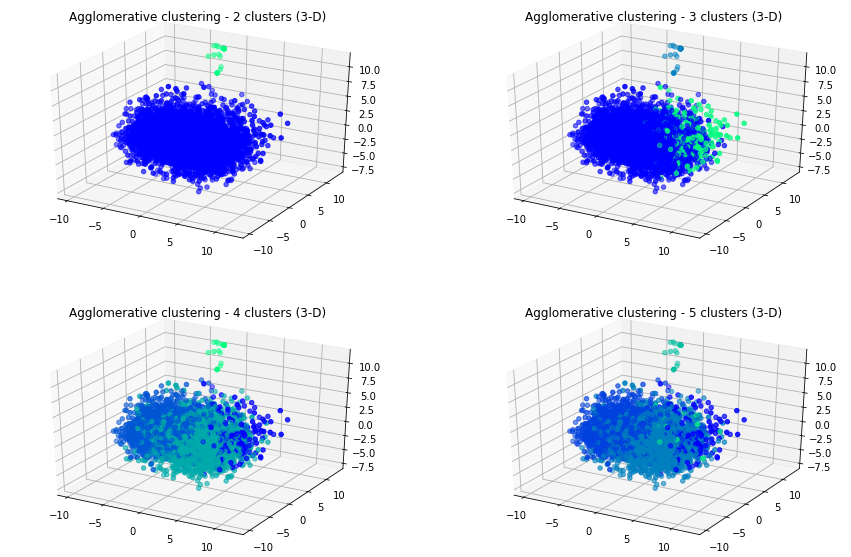

In [29]:
#Visualizing K-Means with # of clusters = 3 and 4 in 3-dimensional graph
#Reducing the dimensions using PCA with 2 principal components
X = np.asarray(data_samples)
pca = PCA(n_components = 3) 
X_principal = pca.fit_transform(X) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2', 'P3'] 


fig = plt.figure(figsize=(15, 10))


ax = fig.add_subplot(221, projection='3d')
ax.scatter(X_principal['P1'], X_principal['P2'], X_principal['P3'], 
           c = AgglomerativeClustering(n_clusters = 2, linkage ='complete').fit_predict(data_samples), cmap =plt.cm.winter)
plt.title("Agglomerative clustering - 2 clusters (3-D)")


ax = fig.add_subplot(222, projection='3d')
ax.scatter(X_principal['P1'], X_principal['P2'], X_principal['P3'], 
           c = AgglomerativeClustering(n_clusters = 3, linkage ='complete').fit_predict(data_samples), cmap =plt.cm.winter)
plt.title("Agglomerative clustering - 3 clusters (3-D)")


ax = fig.add_subplot(223, projection='3d')
ax.scatter(X_principal['P1'], X_principal['P2'], X_principal['P3'], 
           c = AgglomerativeClustering(n_clusters = 4, linkage ='complete').fit_predict(data_samples), cmap =plt.cm.winter)
plt.title("Agglomerative clustering - 4 clusters (3-D)")


ax = fig.add_subplot(224, projection='3d')
ax.scatter(X_principal['P1'], X_principal['P2'], X_principal['P3'], 
           c = AgglomerativeClustering(n_clusters = 5, linkage ='complete').fit_predict(data_samples), cmap =plt.cm.winter)
plt.title("Agglomerative clustering - 5 clusters (3-D)")

 After comparing "Average" linkage type and "Complete" linkage type, "complete" linkage type is giving much better results  compared to the "average" linkage type. Based on the 2-D and 3-D plots of clusters, Optimum number of clusters are either 2, 4 and 5. 

Silhoutte score for # of cluster in range of 2 to 8:  [0.08261269424314405, 0.06565671185708044, 0.05255863224240789, 0.04890743211365657, 0.04418401977866516, 0.03211173456297662]


Text(0.5, 1.0, 'Reduced dim. Agg. clustering - 5 clusters')

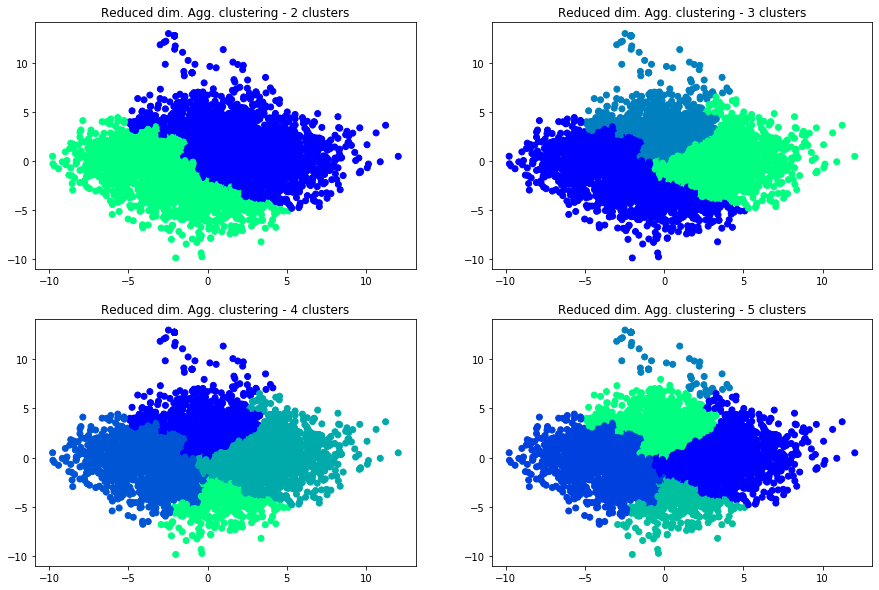

In [30]:
#Reducing dimenions using PCA before applying Complete linkage clustering

#Reducing dimensions using PCA with # of components = 2
X = np.asarray(data_samples)
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 


sill_complete = []
for n_cluster in range(2, 8):
    sill_complete.append( 
        silhouette_score(data_samples, AgglomerativeClustering(n_clusters = n_cluster, 
                                                              linkage ='complete').fit_predict(X_principal))) 

    
print("Silhoutte score for # of cluster in range of 2 to 8: ", sill_complete)    

fig = plt.figure(figsize=(15, 10))


ax = fig.add_subplot(221)
ax.scatter(X_principal['P1'], X_principal['P2'], 
           c = AgglomerativeClustering(n_clusters = 2, linkage ='complete').fit_predict(X_principal), cmap =plt.cm.winter)
plt.title("Reduced dim. Agg. clustering - 2 clusters")


ax = fig.add_subplot(222)
ax.scatter(X_principal['P1'], X_principal['P2'],  
           c = AgglomerativeClustering(n_clusters = 3, linkage ='complete').fit_predict(X_principal), cmap =plt.cm.winter)
plt.title("Reduced dim. Agg. clustering - 3 clusters")


ax = fig.add_subplot(223)
ax.scatter(X_principal['P1'], X_principal['P2'],  
           c = AgglomerativeClustering(n_clusters = 4, linkage ='complete').fit_predict(X_principal), cmap =plt.cm.winter)
plt.title("Reduced dim. Agg. clustering - 4 clusters")


ax = fig.add_subplot(224)
ax.scatter(X_principal['P1'], X_principal['P2'],  
           c = AgglomerativeClustering(n_clusters = 5, linkage ='complete').fit_predict(X_principal), cmap =plt.cm.winter)
plt.title("Reduced dim. Agg. clustering - 5 clusters")


Gaussian Mixture Models

Text(0.5, 1.0, 'GMM Silhouette score v/s # of clusters ')

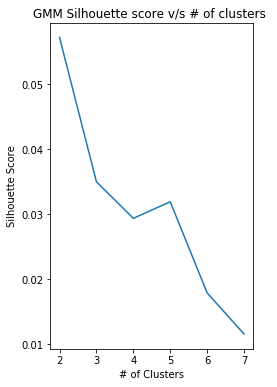

In [31]:
'''
Representation of a Gaussian mixture model probability distribution. This class allows to estimate the parameters 
of a Gaussian mixture distribution
'''

#Gaussian Mixture Models Clustering

def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]


sils=[]
sils_err=[]
iterations=20
for n in range(2, 8):
    tmp_sil=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2,  covariance_type = 'tied').fit(data_samples) 
        labels=gmm.predict(data_samples)
        sil=silhouette_score(data_samples, labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean(SelBest(np.array(tmp_sil), int(iterations/5)))
    sils.append(val)    
    

#Plotting the Silhouette curve for Gaussian Mixture Models

fig, ax = plt.subplots(figsize=(8, 6))


plt.subplot(1,2,1)
plt.plot(range(2,8), sils)
plt.xlabel("# of Clusters")
plt.ylabel('Silhouette Score')
plt.title('GMM Silhouette score v/s # of clusters ')

Text(0.5, 1.0, 'GMM clustering - 4 clusters')

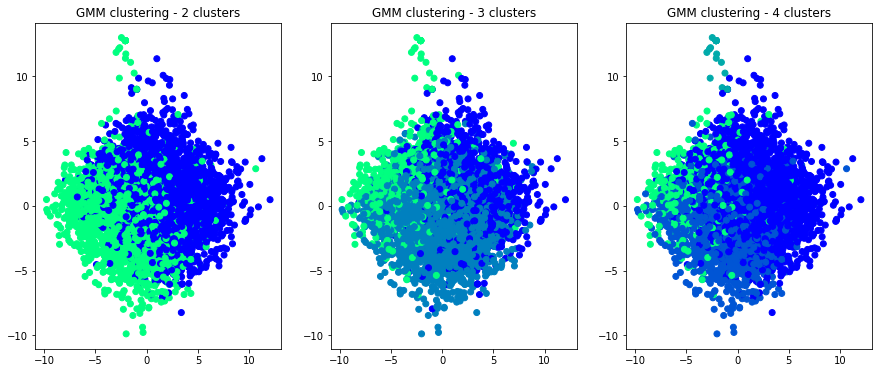

In [32]:
#Reduce the dimensions of the data using PCA to visualize clusters

X = np.asarray(data_samples)
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  

#Plotting the clusters with 2,3 and 4 clusters
fig, ax = plt.subplots(figsize=(15, 6))
plt.subplot(1,3,1)
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = GaussianMixture(2, n_init=2, covariance_type = 'tied').fit_predict(data_samples), cmap =plt.cm.winter)  
plt.title("GMM clustering - 2 clusters")

plt.subplot(1,3,2)
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = GaussianMixture(3, n_init=2,  covariance_type = 'tied').fit_predict(data_samples), cmap =plt.cm.winter)  
plt.title("GMM clustering - 3 clusters")

plt.subplot(1,3,3)
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = GaussianMixture(4, n_init=2,  covariance_type = 'tied').fit_predict(data_samples), cmap =plt.cm.winter)  
plt.title("GMM clustering - 4 clusters")

 GMM is not able to cluster the data properly and silhoutte score is negative or close to 0, so we discard GMM

DBSCAN

# of different lables predicted by DBSCAN: 3


Text(0.5, 1.0, 'Clusters using DBSCAN clustering')

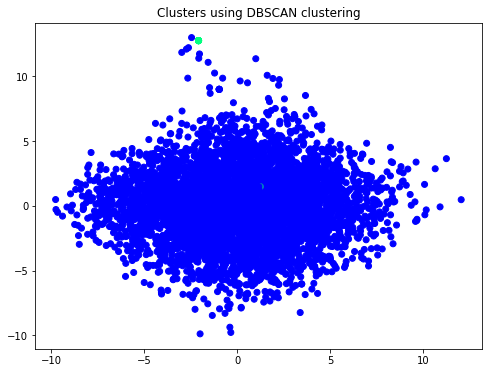

In [33]:
'''
Density-based spatial clustering of applications with noise (DBSCAN)
Tried various combination of eps and min_samples and eps=.3 and min_samples=5 is giving best results
'''

#With Original Dataset

dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan = dbscan.fit(data_samples)

labels = dbscan.labels_
print("# of different lables predicted by DBSCAN:", len(set(labels)))

#Visualizing the clusters created by DBSCAN

#Reducing dimensions to 2 principal before visualizing the clusters
X = np.asarray(data_samples)
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 


#Plotting the scatter plots 
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = labels, cmap =plt.cm.winter)  
plt.title("Clusters using DBSCAN clustering")

# of different lables predicted by DBSCAN: 3


Text(0.5, 1.0, 'Clusters using DBSCAN clustering')

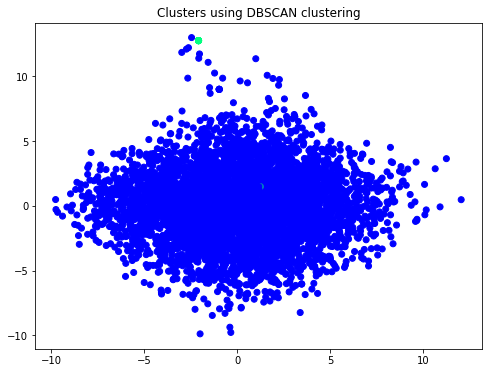

In [34]:
#Lets try to implement DBSCAN algorithm after reducing the dimensions

#Reducing dimensions to 2 principal before running the DBSCAN
X = np.asarray(data_samples)
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2']

dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan = dbscan.fit(data_samples)
labels = dbscan.labels_
print("# of different lables predicted by DBSCAN:", len(set(labels)))

#Visualizing the clusters created by DBSCAN
#Plotting the scatter plots 
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = labels, cmap =plt.cm.winter)  
plt.title("Clusters using DBSCAN clustering")

 DBSCAN is also not able to provide any significant clusters, so we discard DBSCAN also

Analysis: Out of 4 algorithms, KMeans with reduced dimension and Agglomerative (hierarchical) clustering (Complete linkage 
          type ) is giving better results with number of clusters 2, 3, 4, and 5. We can choose between 
          these numbers based on how we cant to cluster our data. Given the size of the data, ie.more than 1M records, we 
          can go with the higher number of clusters          

In [35]:
#Choosing K-Means clustering with reduced diemension with number of clusters 3 to implement on our entire dataset as
#the size of the dataset is huge and we have limited computation power and time

Text(0.5, 1.0, 'Reduced dim. K-Means with 3 clusters')

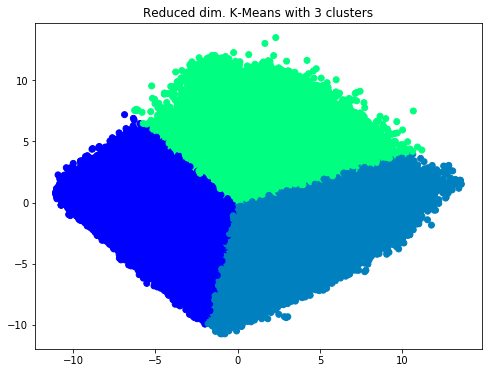

In [36]:
#Reducing dimensions using PCA with no of components = 2
pca = PCA(n_components = 2) 
pca = pca.fit(data_filtered_null)
X_principal = pca.transform(data_filtered_null) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2']


#Applying K-Means algorithm
kmean = KMeans(n_clusters=3, random_state=42, init = 'k-means++')
kmean = kmean.fit(X_principal)
lables = kmean.predict(X_principal)


#Visualizing K-Means clusters
plt.figure(figsize=(8,6))
plt.scatter(X_principal['P1'], X_principal['P2'], c = lables, cmap =plt.cm.winter)  
plt.title("Reduced dim. K-Means with 3 clusters")

In [38]:
#Analyzing each cluster centroid and median principal component values

print('Cluster 1 center:', kmean.cluster_centers_[0])
print('Cluster 2 center:', kmean.cluster_centers_[1])
print('Cluster 3 center:', kmean.cluster_centers_[2])

#Calculating ranges of principal componenets based on each cluster
df = X_principal 
df['labels'] = lables

print('\n\nP1 and P2 ranges in Cluster 1:', (min(df[df.labels==0]['P1']), max(df[df.labels==0]['P1']) ), 
                                        (min(df[df.labels==0]['P2']), max(df[df.labels==0]['P2']) ))

print('P1 and P2 ranges in Cluster 2:', (min(df[df.labels==1]['P1']), max(df[df.labels==1]['P1']) ), 
                                        (min(df[df.labels==1]['P2']), max(df[df.labels==1]['P2']) ))


print('P1 and P2 ranges in Cluster 3:', (min(df[df.labels==2]['P1']), max(df[df.labels==2]['P1']) ), 
                                        (min(df[df.labels==2]['P2']), max(df[df.labels==2]['P2']) ))



Cluster 1 center: [-3.36314237 -0.65924757]
Cluster 2 center: [ 2.72526092 -1.73257127]
Cluster 3 center: [0.88923093 2.97331893]


P1 and P2 ranges in Cluster 1: (-11.073908054998387, -0.1376835974513858) (-9.95470924792254, 7.200174913024091)
P1 and P2 ranges in Cluster 2: (-1.8043375196733928, 13.587526645141153) (-10.750576027584403, 3.9867775986749807)
P1 and P2 ranges in Cluster 3: (-6.257227881938193, 11.195596906005026) (-0.13229229623534755, 13.508329860354701)




   Use pca.transform() to get the principal component for new test data set, and then apply kmean.predict() 
to get the final cluster assignment. We can also append labels column to the sample dataframe to further get the cluster characterstics on individual columns (50 survey columns)
